Aim:
format the data and merge them in one table

In [43]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [44]:
def to_df(source):
    df = pd.DataFrame()
    for i in source:
        df = df.append(pd.read_csv(i), sort= True)
    return df

In [45]:
#choose the file to import to df
h = [i for i in os.listdir() if 'Hu_Vker' in i]
co = [i for i in os.listdir() if 'Com_Vker' in i]
ce = [i for i in os.listdir() if 'Cen_Vker' in i]
print('Hu:', h)
print('Com:', co)
print('Cen', ce)

Hu: ['Hu_Vker.csv', 'Hu_Vker2019-11-06.csv', 'Hu_Vker2019-11-11.csv', 'Hu_Vker2019-11-14.csv', 'Hu_Vker2019-11-26.csv']
Com: ['Com_Vker.csv', 'Com_Vker2019-11-06.csv', 'Com_Vker2019-11-14.csv', 'Com_Vker2019-11-26.csv']
Cen ['Cen_Vker.csv', 'Cen_Vker2019-11-06.csv', 'Cen_Vker2019-11-11.csv', 'Cen_Vker2019-11-14.csv', 'Cen_Vker2019-11-26.csv']


In [46]:
#select the files to load
Hun = to_df(h[-1:])
Com = to_df(co[-1:])
Cen = to_df(ce[-1:])
print('Shape of Hun',Hun.shape)
print('Shape of Com',Com.shape)
print('Shape of Cen',Cen.shape)

Shape of Hun (47, 9)
Shape of Com (130, 11)
Shape of Cen (14, 10)


#### clean up the source data

In [8]:
Hun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
agency         33 non-null object
date           47 non-null object
description    47 non-null object
id             47 non-null int64
price          47 non-null int64
room           47 non-null int64
source         47 non-null object
sqm            47 non-null int64
url            47 non-null object
dtypes: int64(4), object(5)
memory usage: 3.4+ KB


In [9]:
Hun.isnull().sum()

agency         14
date            0
description     0
id              0
price           0
room            0
source          0
sqm             0
url             0
dtype: int64

In [32]:
#HUN.loc[HUN['sqm'].isnull()]

In [48]:
#delete the extra rows
HUN.drop(HUN.loc[HUN['sqm'].isnull()].index, axis = 0, inplace= True)
HUN.shape

(867, 10)

In [10]:
#create 'price_sqm' column
Hun['price_sqm'] = Hun['price'] / Hun['sqm']
Hun['price_sqm'] = Hun['price_sqm'].astype(int)
Hun['price'] = Hun['price'] / 1000000.0

In [11]:
Hun['date'].value_counts()

2019-11-25    24
2019-11-19    23
Name: date, dtype: int64

In [12]:
Com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 11 columns):
agency         10 non-null object
date           130 non-null object
description    0 non-null float64
id             130 non-null int64
price          130 non-null float64
price_sqm      130 non-null int64
region         130 non-null object
room           130 non-null int64
source         130 non-null object
sqm            130 non-null int64
url            130 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 11.2+ KB


In [13]:
Com.isnull().sum()

agency         120
date             0
description    130
id               0
price            0
price_sqm        0
region           0
room             0
source           0
sqm              0
url              0
dtype: int64

In [14]:
Com.head(3)

,agency,date,description,id,price,price_sqm,region,room,source,sqm,url
0,Saját hirdetés,2019-11-19,NaN,30477505,22.7,840741,"Lipótváros, V. kerület",2,com,27,https://ingatlan.com/v-ker/elado+lakas/tegla-e...
1,NaN,2019-11-19,NaN,30301385,22.8,844444,"Szent István körút, V. kerület",1,com,27,https://ingatlan.com/v-ker/elado+lakas/tegla-e...
2,NaN,2019-11-19,NaN,30407710,26.4,1015385,"Lipótváros, V. kerület",1,com,26,https://ingatlan.com/v-ker/elado+lakas/tegla-e...


In [15]:
Cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
agency         0 non-null float64
date           14 non-null object
description    14 non-null object
id             14 non-null int64
price          14 non-null float64
region         14 non-null object
room           14 non-null int64
source         14 non-null object
sqm            14 non-null int64
url            14 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 1.2+ KB


In [16]:
Cen.isnull().sum()

agency         14
date            0
description     0
id              0
price           0
region          0
room            0
source          0
sqm             0
url             0
dtype: int64

In [17]:
Cen['price_sqm'] = Cen['price']*1000000 / Cen['sqm']
Cen['price_sqm'] = Cen['price_sqm'].astype(int)

In [18]:
Cen.head(3)

,agency,date,description,id,price,region,room,source,sqm,url,price_sqm
0,NaN,2019-11-19,Kis lakás panorámával\nA Parlament és az Olimp...,14123464,75.0,H397307,1,centrum,33,https://www.oc.hu/ingatlanok/H397307?c=1b06e8e0,2272727
1,NaN,2019-11-19,Garzonlakás a Váci utcában\nFelújítandó egy sz...,12625576,44.3,H387534,1,centrum,33,https://www.oc.hu/ingatlanok/H387534?c=1b06e8e0,1342424
2,NaN,2019-11-19,V. Garibaldi utca\nV. kerület egyik legkedvelt...,13205004,45.0,H391318,1,centrum,28,https://www.oc.hu/ingatlanok/H391318?c=1b06e8e0,1607142


#### create one DB

In [19]:
VkerDB = pd.concat([Hun,Com,Cen], axis = 0, sort = True, ignore_index = True)
VkerDB.shape

(191, 11)

In [20]:
# cleaning-up 'room'
VkerDB['room'].value_counts()

1    176
2     13
0      2
Name: room, dtype: int64

In [21]:
VkerDB.loc[VkerDB['room'] == '1 + 1 félszoba', 'room'] = 1.5
VkerDB['room'] = VkerDB['room'].astype(float)
VkerDB.loc[VkerDB['room'] == 0.0, 'room'] = 1.0

/home/trismegistos/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [22]:
VkerDB['room'].value_counts()

1.0    92
2.0     7
Name: room, dtype: int64

In [66]:
#cleaning-up 'type'
#VkerDB['type'].value_counts()

Tégla    987
Nincs     40
Name: type, dtype: int64

In [69]:
#Type is not informative, delete from data extraction
#VkerDB.drop(['type'], axis = 1, inplace= True)

In [21]:
#cleaning-up agency
VkerDB['agency'].value_counts()

Saját hirdetés                              10
CDC Ingatlan IV.Ker. Szita Ingatlan Kft.     7
Gold House Ingatlaniroda                     6
CDC Bokréta                                  4
CDC Báthory                                  4
Cdci Teréz krt-i iroda                       4
GDN Ingatlaniroda.                           2
Homexpress Ingatlaniroda                     2
GREAT HOME                                   2
OTP Ingatlanpont Hűvösvölgyi út              1
OTP Ingatlanpont Szépvölgyi út               1
Name: agency, dtype: int64

In [22]:
VkerDB.isnull().sum()

agency         148
date             0
description    130
id               0
price            0
price_sqm        0
region          47
room             0
source           0
sqm              0
url              0
dtype: int64

In [23]:
# reorganise columns
VkerDB = VkerDB[['id', 'date', 'price', 'price_sqm', 'room', 'sqm','region','description','agency', 'source','url']]

In [47]:
Dbfull = pd.read_csv('VkerDB.csv')
print('No of before ads: ',Dbfull.shape)
alls = pd.concat([Dbfull,VkerDB], axis = 0, ignore_index= True)
print('No of ads after: {}'.format(alls.shape))

No of before ads:  (2907, 11)
No of ads after: (2907, 11)


In [25]:
#archive data
#alls.to_csv('VkerDB.csv', index=False, index_label=None)

In [48]:
counts = sorted(zip(alls['date'].value_counts().index,alls['date'].value_counts()))

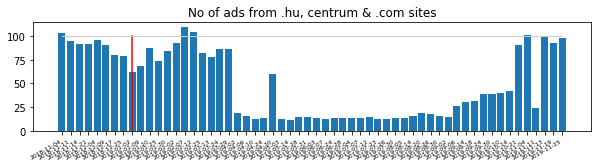

In [78]:
fig = plt.figure(figsize=(10,2))
plt.bar([i[0] for i in counts],[i[1] for i in counts])
plt.plot((counts[8][0], counts[8][0]),(0,100), c= 'r')
plt.plot([counts[0][0],counts[-1][0]],[100,100], c='#cccccc', linewidth = 1)
plt.title('No of ads from .hu, centrum & .com sites')
plt.xticks(rotation=30, ha = 'right', fontsize = '6')
plt.show()